# Final Exam Solution, FoML, AIT PMDS 2021

In this exam, you will generate some synthetic data for a binary classification task and then
evaluate two models on the synthetic data: logistic regression and a fully connected neural network.

## Question 1 (10 points)

Generate a dataset with examples $\mathbf{x}^{i} \in \mathbb{R}^2$ and $y^{i} \in \{ 0, 1 \}$.

Class 0 should come from a 2D Gaussian with mean $\begin{bmatrix} 10 \\ 5 \end{bmatrix}$ and covariance
$\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$.

Class 1 should come from a 2D Gaussian with mean $\begin{bmatrix} 5 \\ 10 \end{bmatrix}$ and covariance
$\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$.

Your dataset should include 100 examples of class 0 and 100 examples of class 1.

In [1]:
import numpy as np

X0 = np.random.multivariate_normal([10, 5], [[2, 0], [0, 2]], 100)
X1 = np.random.multivariate_normal([5, 10], [[2, 0], [0, 2]], 100)
X = np.concatenate((X0, X1), 0)
y = np.concatenate((np.zeros((100)), np.ones((100))))

## Question 2 (10 points)

Split the dataset from Question 1 into training (80%) and validation (20%). Place your code in the cell below.

In [2]:
index = np.random.permutation(200)
train_index = index[:160]
val_index = index[160:]
X_train = X[train_index,:]
X_val = X[val_index,:]
y_train = y[train_index]
y_val = y[val_index]

## Question 3 (10 points)

Visualize the dataset from Question 1. Show scatter plots with class 0 and class 1 shown in different colors,
with different shapes for training and validation. Place your code in the cell below.

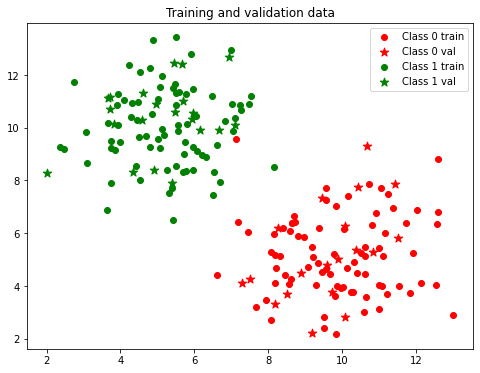

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c='r', marker='o', label='Class 0 train')
plt.scatter(X_val[y_val==0,0], X_val[y_val==0,1], s=80, c='r', marker='*', label='Class 0 val')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='g', marker='o', label='Class 1 train')
plt.scatter(X_val[y_val==1,0], X_val[y_val==1,1], s=80, c='g', marker='*', label='Class 1 val')
plt.legend()
plt.title('Training and validation data')
plt.show()

## Question 4 (30 points)

Build a logistic regression classifier for the dataset. Show the training and validation set's loss curves and the decision boundary in graphs. Place your code in the cell below.

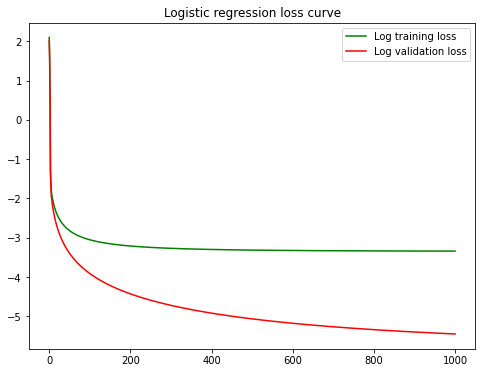

In [4]:
def lr_loss(X, y, theta):
    m = X.shape[0]
    XX = np.concatenate((np.ones((m, 1)), X), 1)
    yy = np.reshape(y, (m, 1))
    yhat = 1 / (1 + np.exp(- XX @ theta))
    loss = np.mean(- yy * np.log(yhat) - (1 - yy) * np.log(1 - yhat))
    return loss

def lr_grad(X, y, theta):
    m = X.shape[0]
    XX = np.concatenate((np.ones((m, 1)), X), 1)
    yy = np.reshape(y, (m, 1))
    yhat = 1 / (1 + np.exp(- XX @ theta))
    loss = np.mean(- yy * np.log(yhat) - (1 - yy) * np.log(1 - yhat))
    grad = (yhat - np.reshape(y, (m, 1))).T @ XX / m
    return loss, grad.T

theta = np.array([[1],[1],[1]])
lr = 0.1
train_loss = []
val_loss = []
for epoch in range(1000):
    loss, grad = lr_grad(X_train, y_train, theta)
    train_loss.append(loss)
    val_loss.append(lr_loss(X_val, y_val, theta))
    theta = theta - lr * grad

plt.figure(figsize=(8, 6))
plt.plot(np.log(train_loss), 'g-', label='Log training loss')
plt.plot(np.log(val_loss), 'r-', label='Log validation loss')
plt.legend()
plt.title('Logistic regression loss curve')
plt.show()

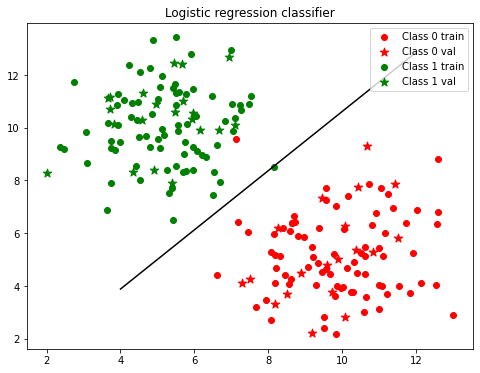

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c='r', marker='o', label='Class 0 train')
plt.scatter(X_val[y_val==0,0], X_val[y_val==0,1], s=80, c='r', marker='*', label='Class 0 val')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='g', marker='o', label='Class 1 train')
plt.scatter(X_val[y_val==1,0], X_val[y_val==1,1], s=80, c='g', marker='*', label='Class 1 val')
x1 = 4
x2 = 12
y1 = (- theta[0] - theta[1] * x1) / theta[2]
y2 = (- theta[0] - theta[1] * x2) / theta[2]
plt.plot((x1, x2), (y1, y2), 'k-')
plt.legend()
plt.title('Logistic regression classifier')
plt.show()

## Question 5 (30 points)

Build a fully connected neural network for the dataset. The network should have at least two
hidden layers. You can select the number of units and activation function. Show the training and validation
loss curves and the final classifier's decision region for class 0 and class 1. Place your code in the cell below.

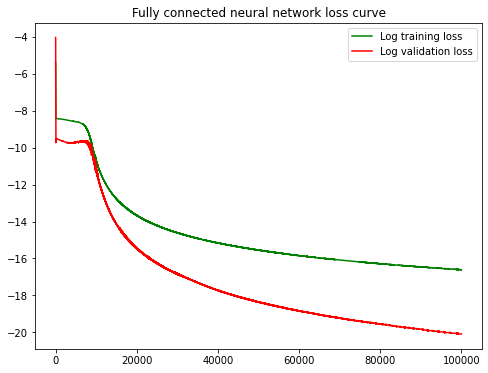

In [14]:
import torch

class Network(torch.nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = torch.nn.Linear(2, 10)
        self.fc2 = torch.nn.Linear(10, 10)
        self.fc3 = torch.nn.Linear(10, 10)
        self.fc4 = torch.nn.Linear(10, 1)
        self.sig = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.fc2(x)
        x = torch.nn.functional.relu(x)
        x = self.fc3(x)
        x = torch.nn.functional.relu(x)
        x = self.fc4(x)
        x = self.sig(x)
        return x

net = Network()
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
y_train_tensor = torch.tensor(y_train, dtype=torch.float).reshape((160, 1))
X_val_tensor = torch.tensor(X_val, dtype=torch.float)
y_val_tensor = torch.tensor(y_val, dtype=torch.float).reshape((40, 1))
loss_func = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

train_loss = []
val_loss = []
for epoch in range(100000):
    net.train()
    net.zero_grad()
    yhat = net(X_train_tensor)
    train_loss_i = loss_func(yhat, y_train_tensor)
    train_loss.append(train_loss_i.item() / 160)
    train_loss_i.backward()
    optimizer.step()
    net.eval()
    yhat = net(X_val_tensor)
    val_loss_i = loss_func(yhat, y_val_tensor)
    val_loss.append(val_loss_i.item() / 40)

plt.figure(figsize=(8, 6))
plt.plot(np.log(train_loss), 'g-', label='Log training loss')
plt.plot(np.log(val_loss), 'r-', label='Log validation loss')
plt.legend()
plt.title('Fully connected neural network loss curve')
plt.show()

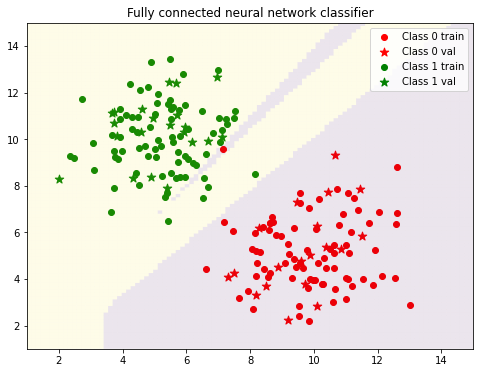

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], c='r', marker='o', label='Class 0 train')
plt.scatter(X_val[y_val==0,0], X_val[y_val==0,1], s=80, c='r', marker='*', label='Class 0 val')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='g', marker='o', label='Class 1 train')
plt.scatter(X_val[y_val==1,0], X_val[y_val==1,1], s=80, c='g', marker='*', label='Class 1 val')
x = np.linspace(1, 15, 100)
y = np.linspace(1, 15, 100)
xv, yv = np.meshgrid(x, y)
X_grid_tensor = torch.tensor(np.concatenate((xv.reshape(-1,1), yv.reshape(-1,1)), 1), dtype=torch.float)
y_grid = net(X_grid_tensor).detach().numpy().reshape(100, 100)
y_grid[y_grid>0.5] = 1
y_grid[y_grid<=0.5] = 0
plt.pcolormesh(x, y, y_grid, alpha=0.1, linewidth=0, antialiased=True)
plt.legend()
plt.title('Fully connected neural network classifier')
plt.show()

## Question 6 (10 points)

In the space below, explain which of the two classifiers, the logistic regression classifier or the fully connected neural network, is more appropriate for this particular problem. Use evidence from the loss curves and decision
regions.

**Answer:** The logistic regression classifier is better in the sense that it is much simpler than the
neural network, with only 3 parameters rather than hundreds. It is not quite as good on the training set, as
it is unable to tweak the boundary to obtain 100% correct on the training set,
but we know that in fact the data are drawn
from spherical Gaussians with the same covariances, so the optimal classifier would actually be a stricly linear
boundary between the two classes. The nonlinearity in the decision boundary of the neural network
is actually overfitting the training data.

## To turn in

Download your notebook as a PDF file and upload to the exam assignment in Google Classroom.